# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd

,City
0,san carlos de bariloche
1,avarua
2,stoyba
3,gobabis
4,mahebourg
...,...
605,chilca
606,walvis bay
607,kachiry
608,kilindoni


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

total_data = cities_pd
total_data['Cloudiness'] = 0
total_data['Country'] = ''
total_data['Date'] = 0
total_data['Humidity'] = 0
total_data['Lat'] = 0
total_data['Lng'] = 0
total_data['Max Temp'] = 0
total_data['Wind Speed'] = 0
params = {}


# Loop through the list of cities and perform a request for data on each
print("--------------------------------------")
print("----- BEGGINING DATA RETRIEVAL -------")
print("--------------------------------------")

for index, row in total_data.iterrows():
        # get city from df
        city = row['City']
    
        # add keyword to params dict
        params['city_name'] = city
    
        # assemble url and make API request
        response = requests.get(query_url + row['City']).json()
    
        try:
            print(f"Processing Record {index} ｜ {city}.")
        
            total_data.loc[index, 'Cloudiness'] = float(response['clouds']['all'])
            total_data.loc[index, 'Country'] = response['sys']['country']
            total_data.loc[index, 'Date'] = float(response['dt'])
            total_data.loc[index, 'Humidity'] = float(response['main']['humidity'])
            total_data.loc[index, 'Lat'] = float(response['coord']['lat'])      
            total_data.loc[index, 'Lng'] = float(response['coord']['lon'])
            total_data.loc[index, 'Max Temp'] = float(response['main']['temp_max'])
            total_data.loc[index, 'Wind Speed'] = float(response['wind']['speed'])
                    
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
print("--------------------------------------")
print("-------- RETRIVAL COMPLETE -----------")
print("--------------------------------------")

--------------------------------------
----- BEGGINING DATA RETRIEVAL -------
--------------------------------------
Processing Record 0 ｜ san carlos de bariloche.
Processing Record 1 ｜ avarua.
Processing Record 2 ｜ stoyba.
Missing field/result... skipping.
Processing Record 3 ｜ gobabis.
Processing Record 4 ｜ mahebourg.
Processing Record 5 ｜ east london.
Processing Record 6 ｜ rikitea.
Processing Record 7 ｜ tiarei.
Processing Record 8 ｜ saskylakh.
Processing Record 9 ｜ grand river south east.
Missing field/result... skipping.
Processing Record 10 ｜ port elizabeth.
Processing Record 11 ｜ dubovskoye.
Processing Record 12 ｜ yellowknife.
Processing Record 13 ｜ mataura.
Processing Record 14 ｜ kasangulu.
Processing Record 15 ｜ ushuaia.
Processing Record 16 ｜ stephenville.
Processing Record 17 ｜ hambantota.
Processing Record 18 ｜ marcona.
Missing field/result... skipping.
Processing Record 19 ｜ arraial do cabo.
Processing Record 20 ｜ ankazoabo.
Processing Record 21 ｜ aykhal.
Processing Record 

Processing Record 214 ｜ bezhetsk.
Processing Record 215 ｜ san patricio.
Processing Record 216 ｜ zemio.
Processing Record 217 ｜ mergui.
Missing field/result... skipping.
Processing Record 218 ｜ belle fourche.
Processing Record 219 ｜ horsham.
Processing Record 220 ｜ nosy varika.
Processing Record 221 ｜ ihosy.
Processing Record 222 ｜ chagoda.
Processing Record 223 ｜ ostrovnoy.
Processing Record 224 ｜ kotelnich.
Processing Record 225 ｜ marshall.
Processing Record 226 ｜ bonavista.
Processing Record 227 ｜ cherskiy.
Processing Record 228 ｜ kieta.
Processing Record 229 ｜ svetlogorsk.
Processing Record 230 ｜ coquimbo.
Processing Record 231 ｜ avera.
Processing Record 232 ｜ bambous virieux.
Processing Record 233 ｜ cairo.
Processing Record 234 ｜ iquitos.
Processing Record 235 ｜ ina.
Processing Record 236 ｜ togur.
Processing Record 237 ｜ katsuura.
Processing Record 238 ｜ oranjemund.
Processing Record 239 ｜ rocha.
Processing Record 240 ｜ neryungri.
Processing Record 241 ｜ attawapiskat.
Missing field

Processing Record 432 ｜ tromso.
Processing Record 433 ｜ biryusinsk.
Processing Record 434 ｜ berlevag.
Processing Record 435 ｜ otukpo.
Processing Record 436 ｜ yar-sale.
Processing Record 437 ｜ santiago del estero.
Processing Record 438 ｜ rivera.
Processing Record 439 ｜ darab.
Processing Record 440 ｜ tura.
Processing Record 441 ｜ dingle.
Processing Record 442 ｜ yumen.
Processing Record 443 ｜ kalianget.
Processing Record 444 ｜ broken hill.
Processing Record 445 ｜ arawa.
Processing Record 446 ｜ ler.
Processing Record 447 ｜ prince rupert.
Processing Record 448 ｜ kichmengskiy gorodok.
Processing Record 449 ｜ teguise.
Processing Record 450 ｜ warrington.
Processing Record 451 ｜ ondjiva.
Processing Record 452 ｜ kudahuvadhoo.
Processing Record 453 ｜ neiafu.
Processing Record 454 ｜ myanaung.
Processing Record 455 ｜ fez.
Processing Record 456 ｜ gimli.
Processing Record 457 ｜ zhenlai.
Processing Record 458 ｜ yerbogachen.
Processing Record 459 ｜ calbuco.
Processing Record 460 ｜ tshikapa.
Processing 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san carlos de bariloche,20.0,AR,1.569256e+09,32.0,-41.13,-71.31,55.40,8.05
1,avarua,100.0,CK,1.569256e+09,88.0,-21.21,-159.78,66.20,3.36
2,stoyba,0.0,,0.000000e+00,0.0,0.00,0.00,0.00,0.00
3,gobabis,0.0,NA,1.569256e+09,7.0,-22.45,18.97,80.60,4.70
4,mahebourg,40.0,MU,1.569256e+09,73.0,-20.41,57.70,71.60,12.75
...,...,...,...,...,...,...,...,...,...
605,chilca,20.0,PE,1.569256e+09,24.0,-13.22,-72.34,66.20,5.82
606,walvis bay,0.0,NA,1.569256e+09,28.0,-22.95,14.51,80.60,17.22
607,kachiry,0.0,KZ,1.569256e+09,38.0,53.07,76.10,56.20,16.93
608,kilindoni,0.0,TZ,1.569256e+09,73.0,-7.91,39.67,79.24,12.10


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
total_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san carlos de bariloche,20.0,AR,1.569256e+09,32.0,-41.13,-71.31,55.4,8.05
1,avarua,100.0,CK,1.569256e+09,88.0,-21.21,-159.78,66.2,3.36
2,stoyba,0.0,,0.000000e+00,0.0,0.00,0.00,0.0,0.00
3,gobabis,0.0,NA,1.569256e+09,7.0,-22.45,18.97,80.6,4.70
4,mahebourg,40.0,MU,1.569256e+09,73.0,-20.41,57.70,71.6,12.75


### Cleaning up data 

In [6]:
# Cleanning Data
# Eliminating values in zero
total_data = total_data[(total_data != 0).all(1)]
# Resetting index
total_data = total_data.reset_index(drop = True) 
total_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san carlos de bariloche,20.0,AR,1.569256e+09,32.0,-41.13,-71.31,55.40,8.05
1,avarua,100.0,CK,1.569256e+09,88.0,-21.21,-159.78,66.20,3.36
2,mahebourg,40.0,MU,1.569256e+09,73.0,-20.41,57.70,71.60,12.75
3,rikitea,100.0,PF,1.569256e+09,75.0,-23.12,-134.97,68.26,15.99
4,saskylakh,90.0,RU,1.569256e+09,86.0,71.97,114.09,30.82,5.03
...,...,...,...,...,...,...,...,...,...
405,raymondville,20.0,US,1.569255e+09,78.0,37.34,-91.83,75.00,8.05
406,zaysan,46.0,KZ,1.569256e+09,55.0,47.47,84.87,62.14,1.72
407,zhigansk,96.0,RU,1.569256e+09,87.0,66.77,123.37,34.42,6.42
408,chilca,20.0,PE,1.569256e+09,24.0,-13.22,-72.34,66.20,5.82


### Verifiying if all the columns have the same data

In [7]:
total_data.count()

City          410
Cloudiness    410
Country       410
Date          410
Humidity      410
Lat           410
Lng           410
Max Temp      410
Wind Speed    410
dtype: int64

### Export Data to a CSV File

In [8]:
export_csv = total_data.to_csv (r'Output Data Weather/Cities.csv', index = "City", header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Verify data types to plot

In [9]:
total_data.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

#### Create a Function to Plot

In [10]:
def scatter_plot(x_values,y_values, title, x_label, y_label, file_name):
    plt.scatter(x_values,y_values)
    plt.title(title,fontweight="bold");
    plt.xlabel(x_label,fontweight="bold");
    plt.ylabel(y_label,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    plt.savefig('Output Data Weather/'+ file_name +'.png')
    plt.show()

#### Latitude vs. Temperature Plot

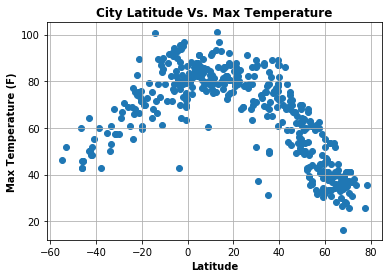

In [11]:
x_values = total_data['Lat']
y_values = total_data['Max Temp']
title = "City Latitude Vs. Max Temperature"
x_label = "Latitude"
y_label = "Max Temperature (F)"
file_name = "Fig.1 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Humidity Plot

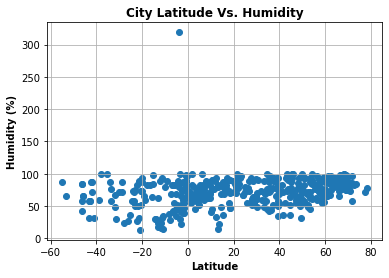

In [12]:
x_values = total_data['Lat']
y_values = total_data['Humidity']
title = "City Latitude Vs. Humidity"
x_label = "Latitude"
y_label = "Humidity (%)"
file_name = "Fig.2 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Cloudiness Plot

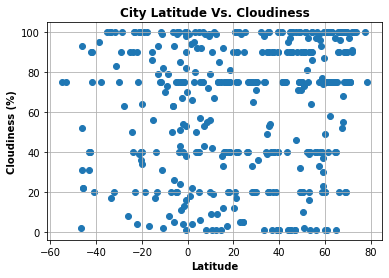

In [13]:
x_values = total_data['Lat']
y_values = total_data['Cloudiness']
title = "City Latitude Vs. Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness (%)"
file_name = "Fig.3 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Wind Speed Plot

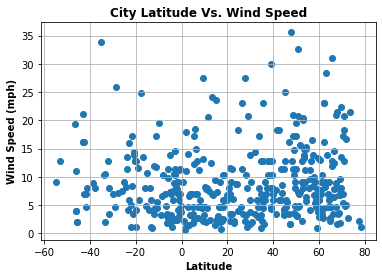

In [14]:
x_values = total_data['Lat']
y_values = total_data['Wind Speed']
title = "City Latitude Vs. Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
file_name = "Fig.4 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

## Linear Regression

### Function to Plot the Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

def scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, eq_location):
    # Define the Location of the Linear Regression Equation
    if eq_location == 'UpperRight':
        loc_x = x_values.max()
        loc_y = y_values.max()
    elif eq_location == 'LowerRight':
        loc_x = x_values.max() - (x_values.max()-x_values.min())/2
        loc_y = y_values.min() 
    elif eq_location == 'UpperLeft':
        loc_x = x_values.min()
        loc_y = y_values.max() - (y_values.max()-y_values.min())/8
    elif eq_location == 'LowerLeft':
        loc_x = x_values.min()
        loc_y = y_values.min()
    elif eq_location == 'Middle':
        loc_x = (x_values.max()+ x_values.min())/2
        loc_y = (y_values.max()+ y_values.min())/2
    
    # Perform a linear regression on latitude vs. temperature
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    # print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"firebrick")

    # Label plot and annotate the line equation
    plt.annotate(line_eq,(loc_x,  loc_y),
                 fontsize=15,color="firebrick")   
    plt.title(chart_title ,fontweight="bold");
    plt.xlabel(x_label ,fontweight="bold");
    plt.ylabel(y_label ,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    # Save Plot
    plt.savefig('Output Data Weather/'+ file_name +'.png')
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()

### Southern Hempisphere Data

In [16]:
# Create Southern Hemisphere DataFrames
total_data_south = total_data.loc[(total_data['Lat'] >= -90) & (total_data['Lat'] <= 0)]
total_data_south

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san carlos de bariloche,20.0,AR,1.569256e+09,32.0,-41.13,-71.31,55.40,8.05
1,avarua,100.0,CK,1.569256e+09,88.0,-21.21,-159.78,66.20,3.36
2,mahebourg,40.0,MU,1.569256e+09,73.0,-20.41,57.70,71.60,12.75
3,rikitea,100.0,PF,1.569256e+09,75.0,-23.12,-134.97,68.26,15.99
8,mataura,52.0,NZ,1.569256e+09,84.0,-46.19,168.86,43.00,4.00
...,...,...,...,...,...,...,...,...,...
393,manutuke,95.0,NZ,1.569256e+09,60.0,-38.68,177.91,60.01,8.99
394,noumea,90.0,NC,1.569256e+09,82.0,-22.28,166.46,73.99,1.12
395,manokwari,1.0,ID,1.569256e+09,80.0,-0.87,134.08,73.12,3.89
401,padang,38.0,ID,1.569256e+09,81.0,-0.92,100.36,79.24,11.14


### Northern Hemisphere Data

In [17]:
# Create Northern Hemisphere DataFrames
total_data_north = total_data.loc[(total_data['Lat'] >= 0) & (total_data['Lat'] <= 90)]
total_data_north

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,saskylakh,90.0,RU,1.569256e+09,86.0,71.97,114.09,30.82,5.03
5,port elizabeth,1.0,US,1.569256e+09,58.0,39.31,-74.98,87.01,8.05
6,dubovskoye,100.0,RU,1.569256e+09,65.0,47.41,42.76,49.36,1.74
7,yellowknife,75.0,CA,1.569255e+09,75.0,62.45,-114.38,44.60,16.11
11,stephenville,75.0,CA,1.569256e+09,93.0,48.55,-58.59,55.99,17.22
...,...,...,...,...,...,...,...,...,...
404,miri,9.0,NG,1.569256e+09,40.0,10.31,9.75,91.30,8.23
405,raymondville,20.0,US,1.569255e+09,78.0,37.34,-91.83,75.00,8.05
406,zaysan,46.0,KZ,1.569256e+09,55.0,47.47,84.87,62.14,1.72
407,zhigansk,96.0,RU,1.569256e+09,87.0,66.77,123.37,34.42,6.42


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8624577994330054


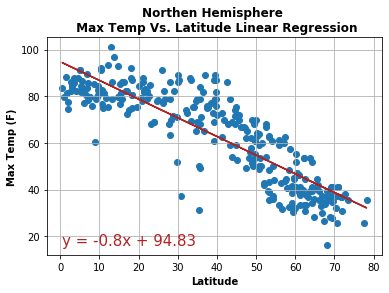

In [18]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Max Temp"]
chart_title = "Northen Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.5 - Northen Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'LowerLeft')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7568728658902563


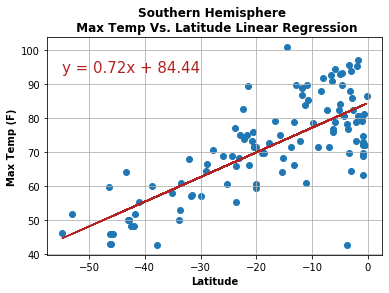

In [19]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Max Temp"]
chart_title = "Southern Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.6 - Southern Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23253351649613319


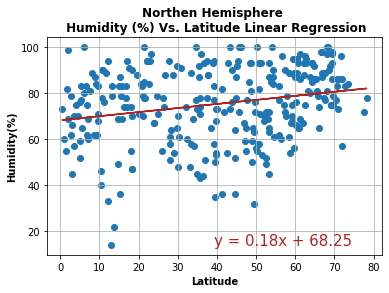

In [20]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Humidity"]
chart_title = "Northen Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.7 - Northen Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerRight')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04737713937361155


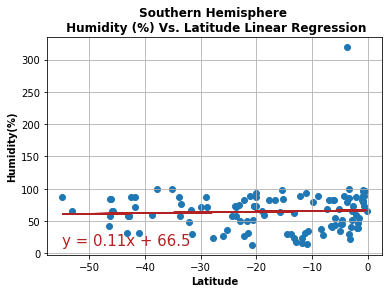

In [21]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Humidity"]
chart_title = "Southern Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.8 - Southern Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerLeft')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18905418886224082


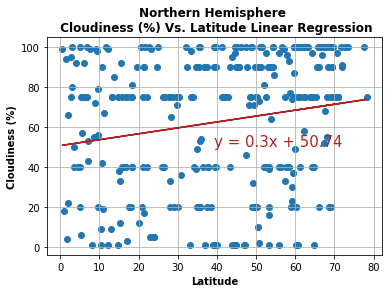

In [22]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Cloudiness"]
chart_title = "Northern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.9 - Northern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'Middle')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0014480874948300223


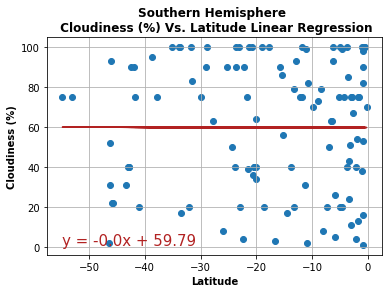

In [23]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Cloudiness"]
chart_title = "Southern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.10 - Southern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerLeft')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1474329839435725


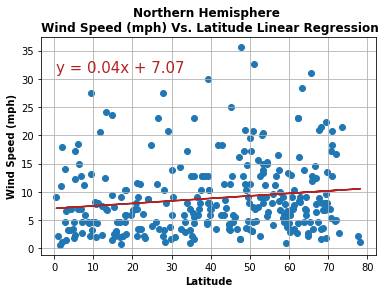

In [24]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Wind Speed"]
chart_title = "Northern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.11 - Northern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.25945137934524615


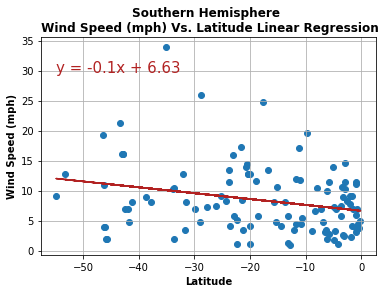

In [25]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Wind Speed"]
chart_title = "Southern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.12 - Southern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')